Homework 5

Copy this notebook. Rename it as: YOURNAME-HW5-streams 

with your name replacing YOURNAME.

Upload your completed jupyter notebook to elearning site as your homework submission. You can put this notebook on your github.

5.1  Register for a stream of Twitter data

5.2  Create a bloom filter classifying two days worth of twitters  ( after removing stop words and urls )

5.3  For another days worth of twitter data find the previous twitters that match in the bloom filter
(This means get two days of data in one file or directory , use that data for training the bloom filter, capture a different days data in a different file ( or do it in real time)and capture the match output then running the new twitter data through the filter.

5.4 Plot a historgram of matches for each twitter in 5.3

For the 4-5 grade.- Submit in a separate notebook - YourNAME-Homework5-Supplement

1. Use a different machine learning training algorithm
2. Make a continous feed where you take two days of data and match the incoming stream ( do this for 5 days windowing the filter data)
3. Find new trends in the twitter feed (daily or hourly)
4. Or some other streaming exploration of your choosing

In [ ]:
Contents

Contents of the Assignment
The main idea of the Assigment was, to determine which coffee brand is more talked about ..Is it Starbucks,Wawa or Dunkin Donuts
1) Registered for Twitter Streaming API
2) Used streaming api to get tweets for two days, first day data is used to train bloom filter and second day data to check the matched words from previous day.
3) Tweets are based on key words : 'Starbucks', 'Wawa','Dunkin Donuts' 
4) Generated Files ie Brand(Nov7) and Brand2 (Nov 10.Took only the tweet data from the file, removed urls and stop words.The filtered data is used to train the bloom filter.The processing is same for second day(Nov-9) with file(Brand2.txt) size is 40+ MB. The filtered data is passed to bloom filter to check the matched words.
5) Tried plotting histogram to showcase the frequency of few of the matched words from both the days.But getting an error.
6) Will try submiiting Supplement.

In [ ]:
# %load twitter_streaming_GG.py
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "129434996-0MvEsIshvl0pvfWrYGSEZODgBrYNejVlf9qtcM8X"
access_token_secret = "SqcZhwFTUr94zk2IiZ1J1SiOy8NDIQAaNlfNLQmlhrnBc"
consumer_key = "ZKComUDNTaUugcpDT9HQtGQJ8"
consumer_secret = "TwEPunbBUIzEuYbc4tU4ompeGwKBUUpCawKgoniUDL0s0LvBhR"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print data
        return True

    def on_error(self, status):
        print status


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['starbucks', 'wawa', 'dunkin donuts'])

In [ ]:
! python twitter_streaming_GG.py > brandpr.txt

In [ ]:
! python twitter_streaming_GG.py > brandpr2.txt

In [8]:
ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is F0BF-48F4

 Directory of C:\Users\gaurav\Anaconda\big-data-python-class-master (1)\big-data-python-class-master\Lectures\Lecture6-Streams\code

11/07/2015  03:24 AM    <DIR>          .
11/07/2015  03:24 AM    <DIR>          ..
11/07/2015  03:24 AM           700,774 brandpr.txt
10/29/2015  04:20 PM           753,718 gg.txt
10/29/2015  04:34 PM         6,512,339 gg1.txt
10/29/2015  04:48 PM        87,316,301 gg3.txt
09/28/2015  07:28 PM             1,075 twitter_streaming.py
11/07/2015  03:23 AM             1,159 twitter_streaming_GG.py
               6 File(s)     95,285,366 bytes
               2 Dir(s)  354,409,730,048 bytes free


In [9]:
! type brandpr.txt

{"created_at":"Sat Nov 07 08:24:29 +0000 2015","id":662908467988922368,"id_str":"662908467988922368","text":"@norazwa35 ye wawa \ud83d\ude0a","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":662850196661923840,"in_reply_to_status_id_str":"662850196661923840","in_reply_to_user_id":1259190612,"in_reply_to_user_id_str":"1259190612","in_reply_to_screen_name":"norazwa35","user":{"id":606955866,"id_str":"606955866","name":"F","screen_name":"khairulmaz","location":null,"url":"http:\/\/instagram.com\/khairul101112","description":null,"protected":false,"verified":false,"followers_count":239,"friends_count":253,"listed_count":0,"favourites_count":3474,"statuses_count":9936,"created_at":"Wed Jun 13 04:09:46 +0000 2012","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":"en","contributors_enabled":false,"is_translator":false,"profile_background_color":"131516","profile_back

In [19]:
# Remove Urls from the tweets
import re
import json
import pandas as pd
tweets_data_path = 'brandpr.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        


tweets_text=[]
tweets_text= map(lambda tweet: tweet['text'], tweets_data)

#print tweets_text[5]

tweets_no_url=[]
tweets_no_url=map(lambda tweet: re.sub( r'https?://[^\s<>"]+|www\.[^\s<>"]+', "", tweet), tweets_text)


In [20]:
print tweets_text[5]

Starbucks. ままと新作💕久しぶりにいつきくんに出会いました😆 https://t.co/KhsBTQfmzp


In [28]:
# Remove Urls from the tweets
import re
import json
import pandas as pd
tweets_data_path2 = 'brandpr2.txt'

tweets_data2 = []
tweets_file2 = open(tweets_data_path2, "r")
for line in tweets_file2:
    try:
        tweet = json.loads(line)
        tweets_data2.append(tweet)
    except:
        continue
        


tweets_text2=[]
tweets_text2= map(lambda tweet: tweet['text'], tweets_data2)

#print tweets_text[5]

tweets_no_url2=[]
tweets_no_url2=map(lambda tweet: re.sub( r'https?://[^\s<>"]+|www\.[^\s<>"]+', "", tweet), tweets_text2)


In [9]:
print tweets_no_url2[100]

RT @NotKennyRogers: As a Christian...my concern about what type of cups Starbucks' uses this Christmas falls somewhere between Kardashian u…


In [29]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode

stopset = set(stopwords.words('english'))

filtered_tweets=[]
for line in tweets_no_url:
    line = line.lower()
    line = unidecode(line)
    tokens=word_tokenize(line)
    tokens = [w for w in tokens if not w in stopset and w.isalnum()]
    filtered_tweets.extend(tokens)


C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\ud83d' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\ude0a' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\udc95' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\ude06' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\ud83e' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate chara

In [30]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode

stopset2 = set(stopwords.words('english'))

filtered_tweets2=[]
for line in tweets_no_url2:
    line = line.lower()
    line = unidecode(line)
    tokens=word_tokenize(line)
    tokens = [w for w in tokens if not w in stopset and w.isalnum()]
    filtered_tweets2.extend(tokens)


C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\ud83e' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\udd17' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\ud83d' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\udc4c' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate character u'\ud83c' will be ignored. You might be using a narrow Python build.
C:\Users\gaurav\Anaconda\lib\site-packages\IPython\kernel\__main__.py:10: RuntimeWarning: Surrogate chara

In [31]:
print filtered_tweets2

['read', 'morning', 'trump', 'wants', 'boycott', 'starbucks', 'red', 'cup', 'fault', 'tho', 'somehow', 'made', 'choice', 'read', 'article', 'starbucks', 'expand', 'slovakia', 'retailnews', 'starbucks', 'red', 'holiday', 'cups', 'inspire', 'outcry', 'online', 'times', 'india', 'conservative', 'christian', 'way', 'priorities', 'ya', 'know', 'rt', 'dekkdaa', 'budak2', 'sekarang', 'fav', 'derang', 'starbucks', 'yg', 'rm18', 'secawan', 'aku', 'dari', 'dulu', 'sampai', 'skrg', 'slurpee', 'je', 'tu', 'pun', 'ayah', 'belanja', 'cup', 'rt', 'khajochi', 'thaamphnakngaan', 'starbucks', 'emnuuaihnchngyaaksud', 'miithangaebngchan', 'wipkhriim', 'tkaetnghnaa', 'aichewlaanaan', 'whole', 'thing', 'gone', 'crazy', 'control', 'goodness', 'sakes', 'give', 'starbucksredcup', 'starbucks', 'responds', 'furor', 'removal', 'christmas', 'new', 'holiday', 'cup', 'starbucks', 'cup', 'ridiculous', 'starbucksredcup', 'starbuckschristmas', 'starbucksproblems', 'rt', 'designovernewz', 'christians', 'angry', 'starbuc

In [32]:
# Train bloom filter with filtered tweets
from pybloom import BloomFilter

bf = BloomFilter(10000000, 0.01,)

counter=0
for word in filtered_tweets:
    counter=counter+1
    bf.add(word.rstrip())

In [35]:
# Total words that are matched

counter=0
matched_words=[]

for word in filtered_tweets2:
    if word in bf:
        if word not in matched_words:
            matched_words.append(word)
print len(matched_words)
print matched_words

775
['read', 'morning', 'starbucks', 'red', 'cup', 'tho', 'choice', 'holiday', 'cups', 'online', 'times', 'way', 'ya', 'know', 'rt', 'yg', 'secawan', 'aku', 'dulu', 'sampai', 'skrg', 'slurpee', 'je', 'tu', 'pun', 'belanja', 'thing', 'gone', 'give', 'christmas', 'new', 'strawberry', 'white', 'amp', 'ko', 'wawa', 'ka', 'naman', 'took', 'dunkin', 'donuts', 'still', 'come', 'sleep', 'lol', 'hate', 'see', 'people', 'upset', 'redcups', 'mean', 'environment', 'god', 'good', 'today', 'next', 'like', 'time', 'veterans', 'day', 'coffee', 'Ri', 'Gu', 'Qian', 'Qu', 'Dong', 'Jing', 'Du', 'back', 'first', 'ever', 'via', 'look', 'checked', 'mplaces', 'download', 'find', 'liked', 'youtube', 'video', 'Dang', 'sutaba', 'clever', 'guy', 'outside', 'please', 'yesterday', 'caramel', 'follow', 'Jiu', 'Wai', 'Xie', 'Zhen', 'Bu', 'Fen', 'Hao', 'old', 'place', 'peppermint', 'mocha', 'frappuccino', 'gift', 'card', 'week', 'writing', 'stupid', 'met', 'om', 'die', 'de', 'na', 'que', 'da', 'redcup', 'staarbakhs', 

In [44]:
print matched_words

['read', 'morning', 'starbucks', 'red', 'cup', 'tho', 'choice', 'holiday', 'cups', 'online', 'times', 'way', 'ya', 'know', 'rt', 'yg', 'secawan', 'aku', 'dulu', 'sampai', 'skrg', 'slurpee', 'je', 'tu', 'pun', 'belanja', 'thing', 'gone', 'give', 'christmas', 'new', 'strawberry', 'white', 'amp', 'ko', 'wawa', 'ka', 'naman', 'took', 'dunkin', 'donuts', 'still', 'come', 'sleep', 'lol', 'hate', 'see', 'people', 'upset', 'redcups', 'mean', 'environment', 'god', 'good', 'today', 'next', 'like', 'time', 'veterans', 'day', 'coffee', 'Ri', 'Gu', 'Qian', 'Qu', 'Dong', 'Jing', 'Du', 'back', 'first', 'ever', 'via', 'look', 'checked', 'mplaces', 'download', 'find', 'liked', 'youtube', 'video', 'Dang', 'sutaba', 'clever', 'guy', 'outside', 'please', 'yesterday', 'caramel', 'follow', 'Jiu', 'Wai', 'Xie', 'Zhen', 'Bu', 'Fen', 'Hao', 'old', 'place', 'peppermint', 'mocha', 'frappuccino', 'gift', 'card', 'week', 'writing', 'stupid', 'met', 'om', 'die', 'de', 'na', 'que', 'da', 'redcup', 'staarbakhs', 'ban

In [37]:
# Frequency of matched words

from collections import Counter
import numpy as np
day_1=Counter(filtered_tweets)
day_2=Counter(filtered_tweets2)
for word in matched_words:
    print 'day 1 count : ',word , " - ",day_1.get(word)
    print 'day 2 count : ',word , " - ",day_2.get(word)
#print day_1.get('Falcons')
#print day_2.get('Falcons')

#len(np.unique(filtered_tweets_day2))
#print len(matched_words)

day 1 count :  read  -  1
day 2 count :  read  -  11
day 1 count :  morning  -  1
day 2 count :  morning  -  25
day 1 count :  starbucks  -  308
day 2 count :  starbucks  -  2845
day 1 count :  red  -  3
day 2 count :  red  -  329
day 1 count :  cup  -  4
day 2 count :  cup  -  344
day 1 count :  tho  -  2
day 2 count :  tho  -  4
day 1 count :  choice  -  1
day 2 count :  choice  -  2
day 1 count :  holiday  -  3
day 2 count :  holiday  -  213
day 1 count :  cups  -  4
day 2 count :  cups  -  568
day 1 count :  online  -  2
day 2 count :  online  -  13
day 1 count :  times  -  3
day 2 count :  times  -  2
day 1 count :  way  -  45
day 2 count :  way  -  14
day 1 count :  ya  -  2
day 2 count :  ya  -  9
day 1 count :  know  -  2
day 2 count :  know  -  38
day 1 count :  rt  -  154
day 2 count :  rt  -  1317
day 1 count :  yg  -  1
day 2 count :  yg  -  5
day 1 count :  secawan  -  1
day 2 count :  secawan  -  1
day 1 count :  aku  -  3
day 2 count :  aku  -  6
day 1 count :  dulu  -  

TypeError: unsupported operand type(s) for +=: 'int' and 'NoneType'

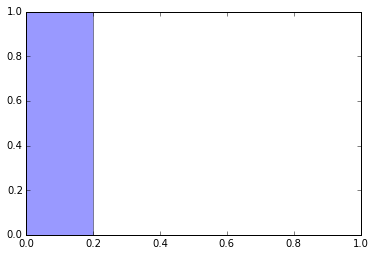

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

day_1 = Counter(filtered_tweets)
day_2 = Counter(filtered_tweets2)

day_1.get('starbucks')

tweets_day_1 = day_1.get('starbucks'),day_1.get('wawa'),day_1.get('dunkin donuts')
tweets_day_2 = day_2.get('starbucks'),day_2.get('wawa'),day_2.get('dunkin donuts')

words=3
fig, ax = plt.subplots()

index = np.arange(words)
bar_width = 0.20
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index, tweets_day_1, bar_width,
                alpha=opacity,
                color='b',
                label='Day1')

rects2 = plt.bar(index+bar_width, tweets_day_2, bar_width,
                alpha=opacity,
                 color='r',
                label='Day2')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of few matched words from 2 days twitter data')
plt.xticks(index + bar_width, ('starbucks','wawa','dunkin donuts'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()
